In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


import warnings
warnings.filterwarnings("ignore")

In [2]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level'])

In [3]:
train_df = pd.read_csv("KDDTrain+.txt" ,names = col_names)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
train_df['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:
test_df = pd.read_csv("KDDTest+.txt", names = col_names)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
test_df['class'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [7]:
combined_data = pd.concat([train_df, test_df])
combined_data.shape

(148517, 43)

In [8]:
combined_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
#label distribution of Training set and testing set
print('Label distribution Training set:')
print(combined_data['class'].value_counts())
print()

Label distribution Training set:
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack        

# Data preprocessing

In [10]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in combined_data.columns:
    if combined_data[col_name].dtypes == 'object' :
        unique_cat = len(combined_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(combined_data['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'class' has 40 categories

Distribution of categories in service:
http        48191
private     26627
domain_u     9937
smtp         8247
ftp_data     7711
Name: service, dtype: int64


In [11]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

In [12]:
combined_data['attack_type'] = combined_data['class'].apply(encode_attack)
combined_data.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


In [13]:
combined_data.groupby('attack_type').size()

attack_type
Dos       51668
Probe     12762
R2L        6944
U2R          89
normal    77054
dtype: int64

In [14]:
percent_data = (combined_data.groupby('attack_type').size())/combined_data.shape[0] * 100
percent_data

attack_type
Dos       34.789283
Probe      8.592956
R2L        4.675559
U2R        0.059926
normal    51.882276
dtype: float64

In [15]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [16]:
combined_data['intrusion_code'] = combined_data['attack_type'].apply(attack_encode)
combined_data.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0.00,normal,20,normal,0
1,0.00,normal,15,normal,0
2,0.00,neptune,19,Dos,1
3,0.01,normal,21,normal,0
4,0.00,normal,21,normal,0
5,1.00,neptune,21,Dos,1
6,0.00,neptune,21,Dos,1
7,0.00,neptune,21,Dos,1
8,0.00,neptune,21,Dos,1
9,0.00,neptune,21,Dos,1


In [17]:
combined_data[combined_data['intrusion_code'] == 4].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
3173,0.0,rootkit,1,U2R,4
5579,0.0,buffer_overflow,9,U2R,4
5831,0.0,buffer_overflow,12,U2R,4
8675,0.0,buffer_overflow,2,U2R,4
11448,0.0,rootkit,0,U2R,4


In [18]:
combined_data = combined_data.drop(columns = ['class','difficulty level', 'attack_type'])

In [19]:
combined_data.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.337148
rerror_rate                    0.305705
srv_rerror_rate                0.302769
dst_host_srv_rerror_rate       0.296317
dst_host_rerror_rate           0.291329
diff_srv_rate                  0.285387
dst_host_srv_serror_rate       0.264306
serror_rate                    0.262728
srv_serror_rate                0.261402
dst_host_serror_rate           0.259309
count                          0.256763
dst_host_same_src_port_rate    0.224602
dst_host_count                 0.189145
dst_host_srv_diff_host_rate    0.175753
num_failed_logins              0.133918
duration                       0.120790
is_guest_login                 0.112382
hot                            0.051790
wrong_fragment                 0.030639
is_host_login                  0.023610
num_shells                     0.023330
root_shell                     0.021541
srv_diff_host_rate             0.019116
urgent                         0.018513


In [20]:
# Select only categorical variables
category_df = combined_data.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['intrusion_code'] = combined_data['intrusion_code']

dummy_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion_code
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)

intrusion_code       1.000000
service_private      0.289597
service_eco_i        0.253762
flag_S0              0.248143
flag_RSTR            0.234345
                       ...   
protocol_type_udp   -0.131615
service_smtp        -0.150071
service_domain_u    -0.213852
flag_SF             -0.443365
service_http        -0.468627
Name: intrusion_code, Length: 85, dtype: float64

In [22]:
combined_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_code'],
      dtype='object')

In [23]:
combined_data = combined_data.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

In [24]:
combined_data.tail(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
22534,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.07,0.00,0.00,0.00,0.0,1.00,1.00,1
22535,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.20,0.04,0.00,0.0,0.00,0.00,0
22536,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,18,0.07,0.05,0.00,0.00,0.00,0.0,1.00,1.00,1
22537,1,tcp,smtp,SF,0,0,1,0,0,0,...,186,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,3
22538,0,icmp,ecr_i,SF,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,1
22539,0,tcp,smtp,SF,0,0,1,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,tcp,http,SF,0,2,1,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,udp,domain_u,SF,0,0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,3


In [25]:
combined_data_new = pd.get_dummies(combined_data)

In [26]:
combined_data_new

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
highly_correlated = combined_data_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
highly_correlated[:35]

intrusion_code                 1.000000
dst_host_srv_count             0.500879
logged_in                      0.472153
service_http                   0.468627
flag_SF                        0.443365
dst_host_same_srv_rate         0.420129
same_srv_rate                  0.368544
dst_host_diff_srv_rate         0.337148
rerror_rate                    0.305705
srv_rerror_rate                0.302769
dst_host_srv_rerror_rate       0.296317
dst_host_rerror_rate           0.291329
service_private                0.289597
diff_srv_rate                  0.285387
dst_host_srv_serror_rate       0.264306
serror_rate                    0.262728
srv_serror_rate                0.261402
dst_host_serror_rate           0.259309
count                          0.256763
service_eco_i                  0.253762
flag_S0                        0.248143
flag_RSTR                      0.234345
dst_host_same_src_port_rate    0.224602
service_domain_u               0.213852
protocol_type_icmp             0.209116


In [28]:
combined_data_new = combined_data_new[list(highly_correlated[:35].index)]

In [29]:
X = combined_data_new.drop(columns = 'intrusion_code')
y = combined_data_new['intrusion_code']

In [30]:
X.shape

(148517, 34)

In [31]:
y.shape

(148517,)

In [32]:
X

,dst_host_srv_count,logged_in,service_http,flag_SF,dst_host_same_srv_rate,same_srv_rate,dst_host_diff_srv_rate,rerror_rate,srv_rerror_rate,dst_host_srv_rerror_rate,...,service_pop_3,dst_host_count,flag_REJ,service_telnet,dst_host_srv_diff_host_rate,service_smtp,protocol_type_udp,duration,service_ftp,is_guest_login
0,25,0,0,1,0.17,1.00,0.03,0.0,0.0,0.00,...,0,150,0,0,0.00,0,0,0,0,0
1,1,0,0,1,0.00,0.08,0.60,0.0,0.0,0.00,...,0,255,0,0,0.00,0,1,0,0,0
2,26,0,0,0,0.10,0.05,0.05,0.0,0.0,0.00,...,0,255,0,0,0.00,0,0,0,0,0
3,255,1,1,1,1.00,1.00,0.00,0.0,0.0,0.01,...,0,30,0,0,0.04,0,0,0,0,0
4,255,1,1,1,1.00,1.00,0.00,0.0,0.0,0.00,...,0,255,0,0,0.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,141,1,0,1,0.72,1.00,0.06,0.0,0.0,0.00,...,0,100,0,0,0.01,1,0,0,0,0
22540,255,1,1,1,1.00,1.00,0.00,0.0,0.0,0.00,...,0,197,0,0,0.01,0,0,0,0,0
22541,255,1,1,1,1.00,1.00,0.00,0.0,0.0,0.07,...,0,255,0,0,0.00,0,0,0,0,0
22542,252,0,0,1,0.99,1.00,0.01,0.0,0.0,0.00,...,0,255,0,0,0.00,0,1,0,0,0


In [33]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-0.84924041, -0.82124893, -0.6930686 , ..., -0.11248106,
        -0.12940356, -0.11163216],
       [-1.06500577, -0.82124893, -0.6930686 , ..., -0.11248106,
        -0.12940356, -0.11163216],
       [-0.84025019, -0.82124893, -0.6930686 , ..., -0.11248106,
        -0.12940356, -0.11163216],
       ...,
       [ 1.21851094,  1.2176576 ,  1.44285862, ..., -0.11248106,
        -0.12940356, -0.11163216],
       [ 1.19154027, -0.82124893, -0.6930686 , ..., -0.11248106,
        -0.12940356, -0.11163216],
       [-0.8852013 , -0.82124893, -0.6930686 , ..., -0.11248106,
        -0.12940356, -0.11163216]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(118813, 34)

In [36]:
X_test.shape

(29704, 34)

# 3 Stage ensemble voting

In [37]:
import xgboost as xgb
dt_clf=DecisionTreeClassifier(random_state=40)
rnd_clf=RandomForestClassifier(random_state=40)
xg_clf=xgb.XGBClassifier(random_state=40)

In [38]:
from sklearn.ensemble import VotingClassifier # Voting Classifier model classification
voting_clf=VotingClassifier(estimators=[('dt',dt_clf),('rn',rnd_clf),('xg',xg_clf)])

In [39]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=40)),
                             ('rn', RandomForestClassifier(random_state=40)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            intera

In [40]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))

DecisionTreeClassifier 0.9976096891754269
RandomForestClassifier 0.9976096891754269
XGBClassifier 0.9954129598612946
VotingClassifier 0.9976096891754269


In [1]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_train, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_train,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_train")
plt.show()

NameError: name 'y_train' is not defined

In [42]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [43]:
print(TPR)

[0.99793845 0.99920155 0.99932039 0.97948439 0.94366197]


In [44]:
print(TNR)

[0.99837438 0.99956119 0.99942864 0.99916156 1.        ]


In [45]:
print(FPR)

[0.00162562 0.00043881 0.00057136 0.00083844 0.        ]


In [46]:
print(ACC)

[0.99814835 0.99943609 0.99941926 0.99824935 0.99996633]


In [47]:
print(TP)

[61477. 41297. 10293.  5395.    67.]


In [48]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
dos_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
probe_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
r2l_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
u2r_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
dos_fpr = fp[1]/ (fp[1] + dos_tn)
probe_fpr = fp[2]/ (fp[2] + probe_tn)
r2l_fpr = fp[3]/ (fp[3] + r2l_tn)
u2r_fpr = fp[4]/ (fp[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [61477 41297 10293  5395    67]
False Positive Per Label: [93 34 62 95  0]
False Negative Per Label: [127  33   7 113   4]
True Negative Per Label: [57116, 77449, 108451, 113210, 118742]
False Positive Rate Per Label: [0.0016256183467636212, 0.000438805931623711, 0.0005713601135347838, 0.0008384449053439831, 0.0]
Overall False Positive Rate = 0.0005975777061432672



# Test

In [49]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

DecisionTreeClassifier 0.9871734446539187
RandomForestClassifier 0.9896983571236198
XGBClassifier 0.990506329113924
VotingClassifier 0.9899003501211958


Precision of Voting Classifier: 0.9895812360401237
Recall of Voting Classifier: 0.9899003501211958
F1-score of Voting Classifier: 0.9896818631288055
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15450
           1       1.00      1.00      1.00     10338
           2       0.97      0.99      0.98      2462
           3       0.95      0.91      0.93      1436
           4       0.33      0.11      0.17        18

    accuracy                           0.99     29704
   macro avg       0.85      0.80      0.81     29704
weighted avg       0.99      0.99      0.99     29704



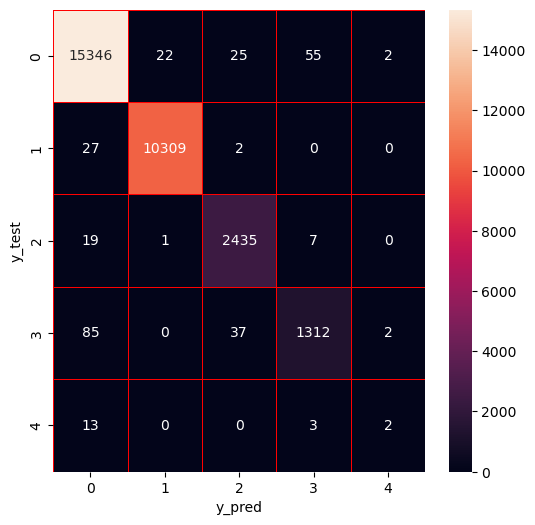

In [50]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [51]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [52]:
print(ACC)

[0.99165096 0.99824939 0.99693644 0.99363722 0.99932669]


In [53]:
print(FPR)

[0.01010243 0.00118765 0.00234931 0.00229942 0.00013474]


In [54]:
print(TPR)

[0.99326861 0.99719482 0.98903331 0.91364903 0.11111111]


In [55]:
print(TNR)

[0.98989757 0.99881235 0.99765069 0.99770058 0.99986526]


In [56]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
dos_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
probe_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
r2l_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
u2r_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
dos_fpr = fp[1]/ (fp[1] + dos_tn)
probe_fpr = fp[2]/ (fp[2] + probe_tn)
r2l_fpr = fp[3]/ (fp[3] + r2l_tn)
u2r_fpr = fp[4]/ (fp[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [15346 10309  2435  1312     2]
False Positive Per Label: [144  23  64  65   4]
False Negative Per Label: [104  29  27 124  16]
True Negative Per Label: [14110, 19343, 27178, 28203, 29682]
False Positive Rate Per Label: [0.010102427388803143, 0.0011876484560570072, 0.002349313559944204, 0.0022994198386868544, 0.00013474365020548407]
Overall False Positive Rate = 0.0025249124697010504



In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf, X, y)
print(scores)
print(np.mean(scores))

[0.96586318 0.99134797 0.99212201 0.99218934 0.95074572]
0.9784536429912801
